# Selección de cripto activos para una cartera de inversión

![picture](https://drive.google.com/uc?export=view&id=1ihM3JEKP-XPaoX9b5bwymu_IF4ntTlz-)

# Trabajo Práctico 2 -  Análisis y Curación

## Introducción


A lo largo de este práctico continuaremos con la exploración del dataset iniciada en el práctio anterior, donde notamos algunas características propias de las series temporales. 
Además, vimos que no se trata de series estacionarias y en nuestro caso no apreciamos patrones de estacionalidad para la serie de tiempo de los precios.

En la siguiente notebook, se presentan las actividades relacionadas a Análisis y Curación. Buscamos identificar e implementar los pasos necesarios para la limpieza de la base de datos, así como también analizar cruces de datos con mayor profundidad. Para esto, los invito a chequear la siguiente [lista](https://dimewiki.worldbank.org/Checklist:_Data_Cleaning), donde se muestran una serie de puntos a tener en cuenta a la hora de tratar nuestros datos.

In [1]:
import pandas as pd

#librerías extra para ploteo de candlesticks
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from datetime import datetime as dt
import missingno as msno
from matplotlib import pyplot
import talib

import os

In [2]:
def create_dataFrame(path):
    df = pd.DataFrame()
    files_list = os.listdir(path)
    for file in files_list:
        file_path = path + '/' + file
        if os.path.isfile(file_path):
            if df.empty:
                df = active_name(file_path, file)
            else:
                df = pd.concat([df, active_name(file_path, file)], axis = 0)
    return df     

def active_name(file, name):
    try:
        df = pd.read_csv(file)
        df.loc[:, 'active'] = name[:-4]
        return df
    except:
        print('Error en %s'% file)

In [3]:
df_all = create_dataFrame('../row_data/')
df_all.shape, df_all.head(10)

((116390, 7),
            unix    open    high     low   close     volume    active
 0  1.602731e+12  51.430  59.000  46.158  49.031  25203.494  AAVEUSDT
 1  1.602745e+12  49.150  49.446  44.514  44.668  19997.896  AAVEUSDT
 2  1.602760e+12  44.629  48.482  44.392  47.000  22164.784  AAVEUSDT
 3  1.602774e+12  47.201  48.017  45.889  46.976   8229.208  AAVEUSDT
 4  1.602788e+12  46.976  47.997  45.673  45.800   7019.526  AAVEUSDT
 5  1.602803e+12  45.801  45.891  42.000  43.719  38813.044  AAVEUSDT
 6  1.602817e+12  43.707  43.707  40.649  41.426  20515.319  AAVEUSDT
 7  1.602832e+12  41.450  42.792  39.911  41.556  20748.984  AAVEUSDT
 8  1.602846e+12  41.474  42.256  40.837  41.743   9247.422  AAVEUSDT
 9  1.602860e+12  41.721  41.830  40.370  40.873   6514.351  AAVEUSDT)

In [4]:
df_all['unix'] = pd.to_datetime(df_all['unix'],unit='ms')

In [5]:
df_all.rename(columns={'unix':'Fecha'},inplace=True)

In [6]:
df_all.set_index('Fecha', inplace = True)

In [7]:
df_all.sort_values(by=['Fecha'],ascending=False)

,open,high,low,close,volume,active
Fecha,,,,,,
2022-05-05 15:00:00,0.6170,NaN,NaN,NaN,NaN,XRPUSDT
2022-05-05 15:00:00,31.4300,NaN,NaN,NaN,NaN,AXSUSDT
2022-05-05 15:00:00,11.4000,NaN,NaN,NaN,NaN,LINKUSDT
2022-05-05 15:00:00,29.7900,NaN,NaN,NaN,NaN,ETCUSDT
2022-05-05 15:00:00,215.1000,NaN,NaN,NaN,NaN,XMRUSDT
...,...,...,...,...,...,...
2019-01-01 03:00:00,7.3740,7.43000,7.35200,7.40900,39067.819,NEOUSDT
2019-01-01 03:00:00,4.9419,5.11270,4.93790,5.04560,45501.840,ETCUSDT
2019-01-01 03:00:00,2.5206,2.56000,2.52040,2.53830,474419.580,EOSUSDT


In [8]:
def status(data):

    data2=data 

    # total de rows
    tot_rows=len(data2)
    
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values

    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows

    # total unique values
    d2['unique']=data2.nunique().values
    
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

In [9]:
status(df_all)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,open,0,0.000000,0,0.0,82819,float64
1,high,274,0.002354,0,0.0,77285,float64
2,low,274,0.002354,0,0.0,77364,float64
3,close,274,0.002354,0,0.0,82547,float64
4,volume,274,0.002354,0,0.0,116113,float64
5,active,0,0.000000,0,0.0,19,object


<AxesSubplot:>

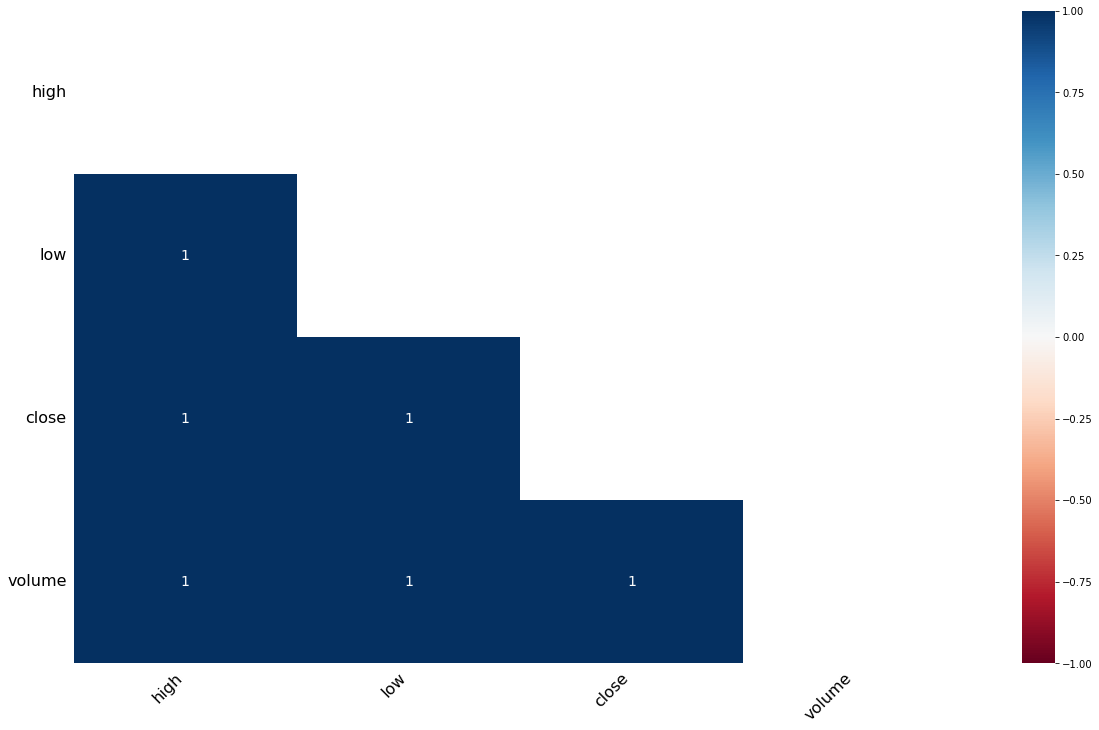

In [10]:
msno.heatmap(df_all)

<AxesSubplot:>

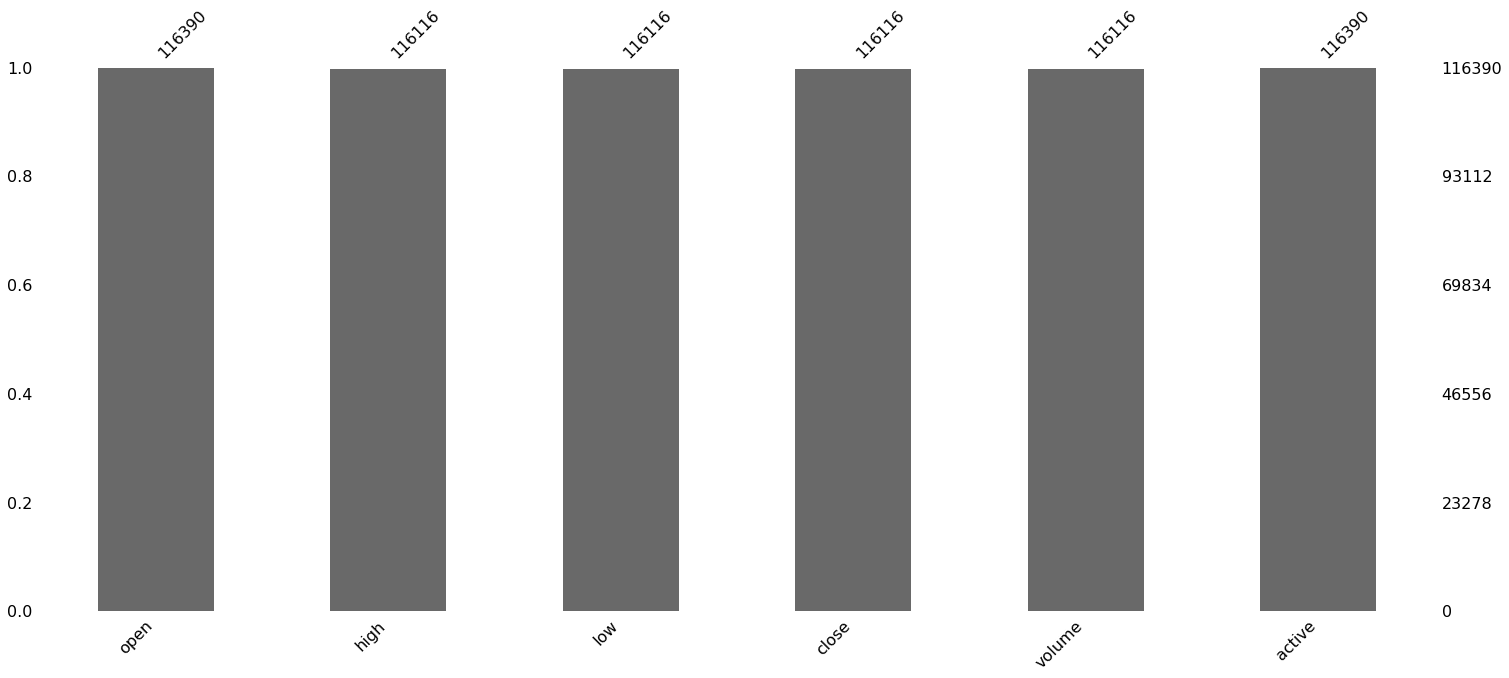

In [11]:
msno.bar(df_all)

In [12]:
df_all = df_all.fillna(method = "ffill")

In [13]:
df_all[df_all.high.isnull()]

,open,high,low,close,volume,active
Fecha,,,,,,


In [14]:
status(df_all)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,open,0,0.0,0,0.0,82819,float64
1,high,0,0.0,0,0.0,77285,float64
2,low,0,0.0,0,0.0,77364,float64
3,close,0,0.0,0,0.0,82547,float64
4,volume,0,0.0,0,0.0,116113,float64
5,active,0,0.0,0,0.0,19,object


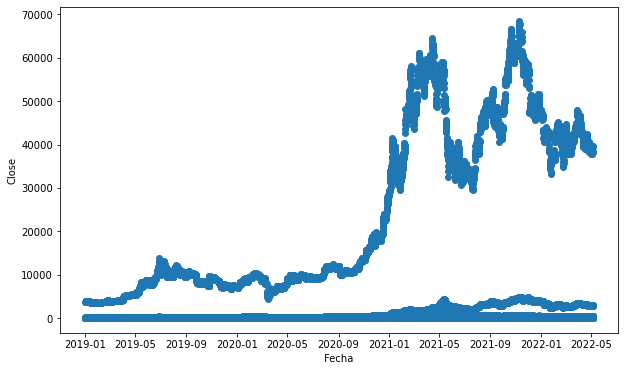

In [15]:
fig, ax = pyplot.subplots(figsize=(10, 6))
ax.scatter(x = df_all.index, y = df_all['close'])
pyplot.xlabel("Fecha")
pyplot.ylabel("Close")

pyplot.show()

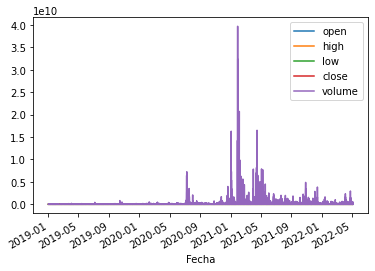

In [16]:
df_all.plot()
pyplot.show()

In [17]:
df_all['profit'] = 100*(df_all['close'] - df_all['open']) / df_all['open']

In [18]:
df_all.head()

,open,high,low,close,volume,active,profit
Fecha,,,,,,,
2020-10-15 03:00:00,51.430,59.000,46.158,49.031,25203.494,AAVEUSDT,-4.664593
2020-10-15 07:00:00,49.150,49.446,44.514,44.668,19997.896,AAVEUSDT,-9.119023
2020-10-15 11:00:00,44.629,48.482,44.392,47.000,22164.784,AAVEUSDT,5.312689
2020-10-15 15:00:00,47.201,48.017,45.889,46.976,8229.208,AAVEUSDT,-0.476685
2020-10-15 19:00:00,46.976,47.997,45.673,45.800,7019.526,AAVEUSDT,-2.503406


# 📖 ¡Actividades! 


Recuerden que la ciencia de datos es un proceso no lineal y continuo, es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de machine learning, vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras. ¡Manos a la obra!

Recomendación: Traten de crear funciones de manera de automatizar la mayor cantidad de pasos posibles. 

## Parte I 

- En el práctico anterior trabajamos con un conjunto de datos preprocesados, los invito a inspeccionar el siguiente conjunto de datos (link). Como pueden ver, el sistema que define las fechas no es el mismo que trabajamos durante el práctico anterior, en este caso las fechas se encuetran en tiempo Unix. Investiguen este sistema y convierta las fechas a tipo datetime. 
Para mayor información pueden ver:
    
    - [Convertir Epoch a Datetime en Python](https://www.delftstack.com/es/howto/python/python-convert-epoch-to-datetime/)


- Indaguen sobre la existencia de valores faltantes. Diferencien entre datos perdidos e inexistentes. Seleccionen un activo y visualicen utilizando la librería Missingno ¿Si uno de los precios falta, también faltan los datos en las demás columnas? ¿Cuál creen que sería la mejor forma de tratarlos? ¿Por qué? Analicen formas de imputarlos, por ejemplo, 

    - reemplazar el faltante con el valor de la media/mediana,
    - utilizar regresión. 
    - métodos backward/forward fill. 
    - Splines, etc. 
    
Para mayor información puede ver el siguiente link [Imputación](https://rpubs.com/wilsonsr/804544)

**Para discutir:** ¿Cuáles podrían ser las razones de la falta de datos, si es que esto ocurre?


- ¿Hay índices repetidos? Resuelvan. 


- Para aprovechar en mayor medida los datos disponibles, analicen dividir los datos en dos posibles conjuntos de acuerdo a la disponibilidad de información según fechas.


- ¿Podría mejorarse la forma en la que está presentada la información? Recuerden que serán necesarios todos los precios de los activos para el cálculo de features. 


- Seleccionen un activo (y alguna de las columnas referidos a precios) y confeccionen un diagrama de dispersión entre el mismo y su valor retardado un período. Repita el mismo procedimiento con sus valores retardado 2, 3 y 4 períodos. 


- Grafiquen e interpreten las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF), para el precio del activo elegido en el punto anterior. El siguiente [link](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) puede ser útil para introducirlos en el tema.


## Parte II 

En esta instancia trabajaremos con algunos features extras que iremos generando a partir de los precios disponibles. Para ello los invito a investigar [talib](http://mrjbq7.github.io/ta-lib/doc_index.html), una de las librerías de python para análisis técnico.

- Agreguen la serie de tasas de rendimientos de cada activo. 


- Calculen las medias móviles de los precios tomando n periodos hacia atrás (n a elección).  


- ¿Conocen algunos indicadores técnicos? Entre los más conocidos podemos mencionar: [RSI](https://admiralmarkets.com/es/education/articles/forex-indicators/como-sacar-beneficio-del-indicador-de-trading-rsi), [MADC](https://admiralmarkets.com/es/education/articles/forex-indicators/macd), [ADX](https://economipedia.com/definiciones/indicador-adx-average-directional-index.html), etc... Pueden construirlos o calcularlos a partir de la librería.


- Si por ejemplo, una característica tiene una varianza de un orden de magnitud mayor que la de las otras características, podría dominar la función objetivo y hacer que el estimador no pueda aprender de otras características correctamente como se esperaba. Para lograr esto se debe llevar a cabo un escalado o normalizado de datos. ¿Cuál es la diferencia?

## Opcional

- Para alguno/s de los activos, detecten las correlaciones entre los features generados utilizando la función Heatmap().




**¡Recuerde!** 

Nunca Modificar los Datos Crudos u Originales Al finalizar la limpieza, deberán guardar el dataset resultante, para asegurarse de no modificar los datos originales.

In [19]:
df_all['EMA_20'] = talib.EMA(df_all.close, timeperiod=20)

In [20]:
df_all['EMA_50'] = talib.EMA(df_all.close, timeperiod=50)

In [21]:
df_all['RSI_20'] = talib.RSI(df_all.close, timeperiod=20)

In [22]:
df_all['RSI_50'] = talib.RSI(df_all.close, timeperiod=50)

In [23]:
df_all.sort_values(by=['Fecha'],ascending=False)

,open,high,low,close,volume,active,profit,EMA_20,EMA_50,RSI_20,RSI_50
Fecha,,,,,,,,,,,
2022-05-05 15:00:00,0.6170,0.63950,0.61500,0.61710,7.503076e+07,XRPUSDT,0.016207,0.623844,0.631960,46.623023,43.953511
2022-05-05 15:00:00,31.4300,34.23000,31.28000,31.44000,4.250906e+05,AXSUSDT,0.031817,31.580479,33.549826,45.666717,40.951689
2022-05-05 15:00:00,11.4000,12.07000,11.35000,11.41000,1.232833e+06,LINKUSDT,0.087719,11.551285,11.820547,45.909056,43.311590
2022-05-05 15:00:00,29.7900,32.08000,29.50000,29.80000,7.139501e+05,ETCUSDT,0.033568,29.144069,29.505470,52.953597,46.482734
2022-05-05 15:00:00,215.1000,225.70000,214.30000,215.20000,3.416042e+04,XMRUSDT,0.046490,216.003692,221.453007,47.332370,46.388819
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01 03:00:00,7.3740,7.43000,7.35200,7.40900,3.906782e+04,NEOUSDT,0.474641,76.913896,82.079326,10.684787,20.645660
2019-01-01 03:00:00,4.9419,5.11270,4.93790,5.04560,4.550184e+04,ETCUSDT,2.098383,2.415063,2.290056,91.606530,82.069759
2019-01-01 03:00:00,2.5206,2.56000,2.52040,2.53830,4.744196e+05,EOSUSDT,0.702214,14.218205,15.337301,11.617034,19.493746


# Fecha de entrega

- __Versión preliminar: 17/6__ 

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 